In [15]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

%matplotlib inline

In [16]:
DS_Poly = pd.read_csv('LogiReg.csv')


In [17]:
DS_Poly["s_rent"]=DS_Poly.loc[DS_Poly["user"]== "Subscriber", "rents"]
DS_Poly["c_rent"]=DS_Poly.loc[DS_Poly["user"]== "Customer", "rents"]

In [18]:
DS_Poly["s_rent"]=DS_Poly["s_rent"].fillna(0)
DS_Poly["c_rent"]=DS_Poly["c_rent"].fillna(0)
DS_Poly

,Unnamed: 0,date_time,user,hour,day,month,week_of_the_year,season,rents,hour_of_the_year,count_x,count_y,s_rent,c_rent
0,0,2019-01-01 00:00:00,Subscriber,0,Tuesday,January,1,3,1,0,0,0,1.0,0.0
1,1,2019-01-01 01:00:00,Subscriber,1,Tuesday,January,1,3,12,1,1,1,12.0,0.0
2,2,2019-01-01 01:00:00,Customer,1,Tuesday,January,1,3,6,2,1,1,0.0,6.0
3,3,2019-01-01 02:00:00,Subscriber,2,Tuesday,January,1,3,11,3,2,2,11.0,0.0
4,4,2019-01-01 02:00:00,Customer,2,Tuesday,January,1,3,4,4,2,2,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16888,16888,2019-12-31 22:00:00,Subscriber,22,Tuesday,December,1,3,33,16888,8699,8699,33.0,0.0
16889,16889,2019-12-31 23:00:00,Subscriber,23,Tuesday,December,1,3,23,16889,8700,8700,23.0,0.0
16890,16890,2019-12-31 23:00:00,Customer,23,Tuesday,December,1,3,11,16890,8700,8700,0.0,11.0
16891,16891,2020-01-01 00:00:00,Subscriber,0,Wednesday,January,1,3,21,16891,8701,8701,21.0,0.0


In [19]:
x = DS_Poly["count_x"].values
y = DS_Poly["s_rent"].values
d = 7

[ 414.07449764  193.1150981  -623.81468256 -292.00802938   98.03257288
   -6.68228482  109.86225948]


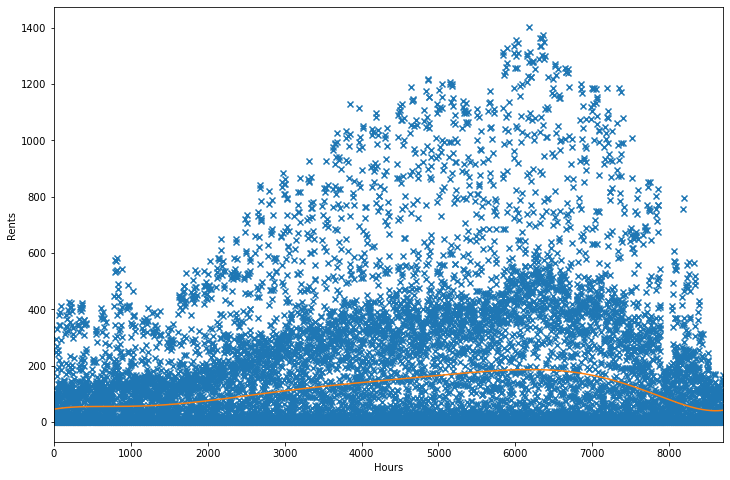

In [20]:
 # Create polynomial features
min_x, max_x = x.min(), x.max()
xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
X = np.array([xs**i for i in range(d,-1,-1)]).T

    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
theta = np.linalg.solve(X.T @ X, X.T @ y)
xt0 = np.linspace(min_x-1, max_x+1, 400)
    
    # create scaled test dataset
xt = 2* (xt0 - min_x)/(max_x - min_x) -1
Xt = np.array([xt**i for i in range(d,-1,-1)]).T
yt = Xt @ theta
    
    # Plot results
plt.figure(figsize = (12,8))
plt.scatter(x, y, marker="x")
ylim = plt.ylim()
plt.plot(xt0, yt, 'C1')
plt.xlabel("Hours")
plt.ylabel("Rents")
plt.xlim([min_x-2, max_x+2])
plt.ylim(ylim)
print(theta[:7]) # prints first 3 thetas

In [21]:
# create an array
X = DS_Poly["count_x"]

# create randomly shuffled list of indexes 
np.random.seed(10) # This method is called when RandomState is initialized
perm = np.random.permutation(len(X))

# select first 70% indexes of shuffled list as train set
idx_train = perm[:int(len(perm)*0.7)]

# select last 30% indexes of shuffled list as train set
idx_cv = perm[int(len(perm)*0.7):]

x_train, y_train = DS_Poly["count_x"].iloc[idx_train].values, DS_Poly["s_rent"].iloc[idx_train].values
x_cv, y_cv = DS_Poly["count_x"].iloc[idx_cv].values, DS_Poly["s_rent"].iloc[idx_cv].values

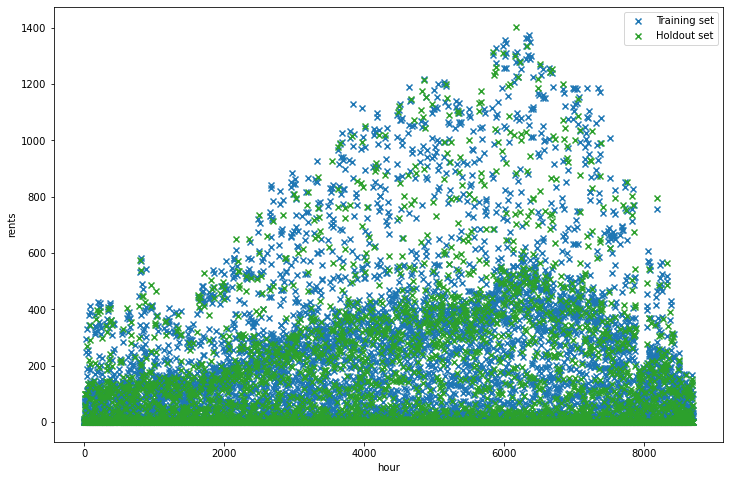

In [22]:
plt.figure(figsize = (12,8))
plt.scatter(x_train, y_train, marker='x', color="C0")
plt.scatter(x_cv, y_cv, marker='x', color="C2")
plt.xlabel("hour")
plt.ylabel("rents")
plt.legend(['Training set', 'Holdout set'])
plt.show()
#plt.savefig('crossvalidation.png', dpi = 300)

In [23]:
x2 = DS_Poly["count_x"].values
y2 = DS_Poly["c_rent"].values
d = 7

[ 111.13756533   36.08939777 -133.59867878    8.67126704  -13.66118081
  -91.92681337   40.39497541]


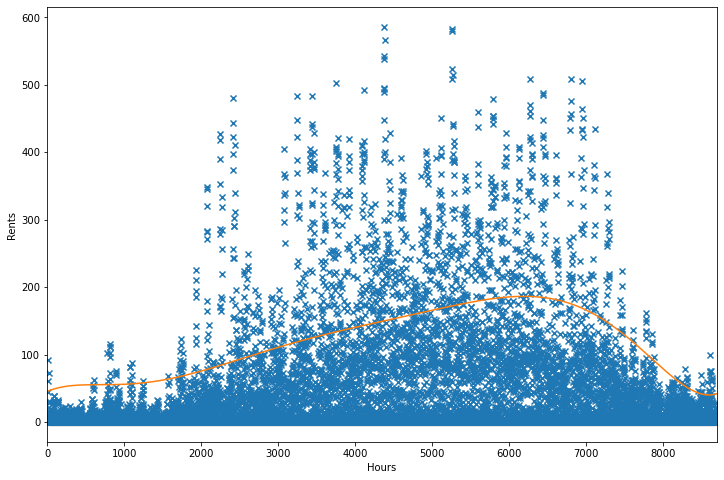

In [24]:
# Create polynomial features
min_x2, max_x2 = x2.min(), x2.max()
x2s = 2*(x2 - min_x2)/(max_x2 - min_x2)-1  # standardize to range [-1,1]
X2 = np.array([x2s**i for i in range(d,-1,-1)]).T

    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
theta = np.linalg.solve(X2.T @ X2, X2.T @ y2)
xt20 = np.linspace(min_x2-1, max_x2+1, 400)
    
    # create scaled test dataset
x2t = 2* (xt20 - min_x2)/(max_x2 - min_x2) -1
X2t = np.array([x2t**i for i in range(d,-1,-1)]).T
y2t = X2t @ theta
    # Plot results
   
plt.figure(figsize = (12,8))
plt.scatter(x2, y2, marker="x")
ylim = plt.ylim()
plt.plot(xt20, yt, 'C1')
plt.xlabel("Hours")
plt.ylabel("Rents")
plt.xlim([min_x2-2, max_x2+2])
plt.ylim(ylim)
print(theta[:7]) # prints first 3 thetas
    

In [25]:
# create an array
X = DS_Poly["count_x"]

# create randomly shuffled list of indexes 
np.random.seed(10) # This method is called when RandomState is initialized
perm = np.random.permutation(len(X))

# select first 70% indexes of shuffled list as train set
idx_train = perm[:int(len(perm)*0.7)]

# select last 30% indexes of shuffled list as train set
idx_cv = perm[int(len(perm)*0.7):]

x_train, y_train = DS_Poly["count_x"].iloc[idx_train].values, DS_Poly["c_rent"].iloc[idx_train].values
x_cv, y_cv = DS_Poly["count_x"].iloc[idx_cv].values, DS_Poly["c_rent"].iloc[idx_cv].values

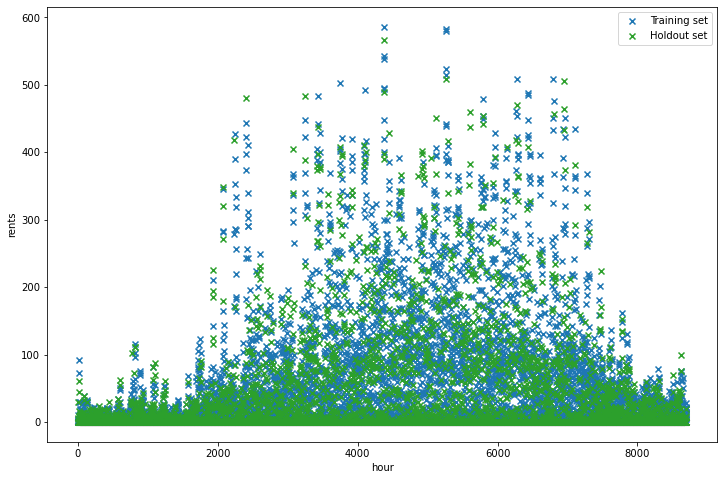

In [26]:
plt.figure(figsize = (12,8))
plt.scatter(x_train, y_train, marker='x', color="C0")
plt.scatter(x_cv, y_cv, marker='x', color="C2")
plt.xlabel("hour")
plt.ylabel("rents")
plt.legend(['Training set', 'Holdout set'])
plt.show()
#plt.savefig('crossvalidation.png', dpi = 300)

In [27]:
x1 = DS_Poly["count_x"].values
y1 = DS_Poly["s_rent"].values
x2 = DS_Poly["count_x"].values
y2 = DS_Poly["c_rent"].values
d = 7

[ 111.13756533   36.08939777 -133.59867878    8.67126704  -13.66118081
  -91.92681337   40.39497541]


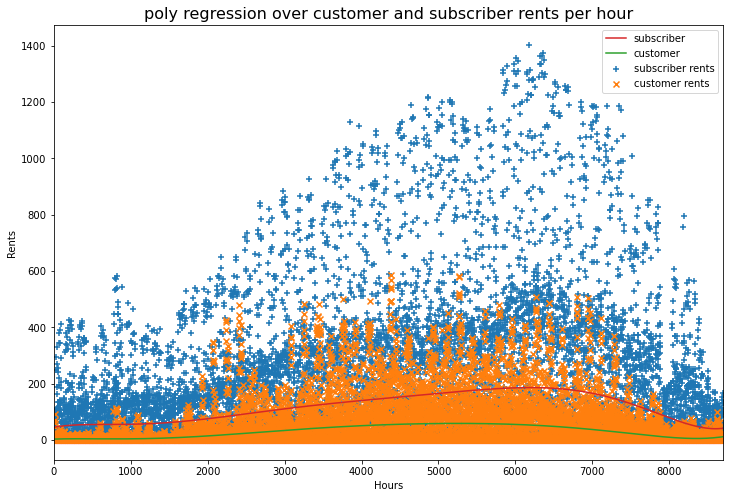

In [28]:
 # Create polynomial features
min_x1, max_x1 = x1.min(), x1.max()
x1s = 2*(x1 - min_x1)/(max_x1 - min_x1)-1  # standardize to range [-1,1]
X1 = np.array([x1s**i for i in range(d,-1,-1)]).T

    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
theta = np.linalg.solve(X1.T @ X1, X1.T @ y1)
xt10 = np.linspace(min_x1-1, max_x1+1, 400)
    
    # create scaled test dataset
x1t = 2* (xt10 - min_x1)/(max_x1 - min_x1) -1
X1t = np.array([x1t**i for i in range(d,-1,-1)]).T
y1t = X1t @ theta
    
    
# Create polynomial features
min_x2, max_x2 = x2.min(), x2.max()
x2s = 2*(x2 - min_x2)/(max_x2 - min_x2)-1  # standardize to range [-1,1]
X2 = np.array([x2s**i for i in range(d,-1,-1)]).T

    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
theta = np.linalg.solve(X2.T @ X2, X2.T @ y2)
xt20 = np.linspace(min_x2-1, max_x2+1, 400)
    
    # create scaled test dataset
x2t = 2* (xt20 - min_x2)/(max_x2 - min_x2) -1
X2t = np.array([x2t**i for i in range(d,-1,-1)]).T
y2t = X2t @ theta
    # Plot results
    
    
plt.figure(figsize = (12,8))
plt.scatter(x1, y1, marker="+")
ylim = plt.ylim()
plt.plot(xt10, y1t, 'C3')
plt.xlabel("Hours")
plt.ylabel("Rents")
plt.xlim([min_x1-2, max_x1+2])
plt.ylim(ylim)

plt.scatter(x2, y2, marker="x")
ylim = plt.ylim()
plt.plot(xt20, y2t, 'C2')
plt.xlabel("Hours")
plt.ylabel("Rents")
plt.xlim([min_x2-2, max_x2+2])
plt.ylim(ylim)

plt.legend(["subscriber", "customer", "subscriber rents", "customer rents"])
plt.title("poly regression over customer and subscriber rents per hour", fontsize=16)
print(theta[:7]) # prints first 3 thetas
plt.savefig('PolyRegression.png', dpi=300)